<a href="https://colab.research.google.com/github/today-dawoon/ds-section1-project/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section1 Project: Video Game
### ✔️ 분석 목적
기발매 게임에 대한 데이터를 토대로 다음 분기에 어떤 게임을 설계해야 할지 탐구하기 위한 분석

### ✔️ 분석 과정

#### 0. 데이터 전처리

#### 1. 데이터 분석

- 1) 지역

    - 연도별 지역 판매량
    
    - 연도별 지역 판매량 백분율
  
- 2) 장르

    - **(필수2)** 연간 최고 발매/ 판매 장르

    - **(필수1)** 지역별 선호 장르

- 3) 플랫폼
  
    - 플랫폼별 판매량
  
- 4) 게임
    - **(필수3)** 최다 판매 게임 top 20

    - 최다 판매 게임 top 20 (2007~2016)
      - Grand Theft Auto
      - Call Of Duty

### ✔️ 분석 결과
- 지역: 북미, 유럽
- 장르: 액션, 슈팅, 스포츠
- 플랫폼: PS, XBOX
- 게임: GTA, Call of Duty 시리즈물

In [ ]:
# 라이브러리 import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy import stats
from scipy.stats import chisquare

In [ ]:
from google.colab import files
myfile = files.upload()

Saving game.csv to game (1).csv


In [ ]:
# df 불러오기
df = pd.read_csv('game.csv', index_col=0)
df.drop_duplicates(keep='first', inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 0. 데이터 전처리

In [ ]:
# Year
df.loc[(df['Year'].values < 50), 'Year'] += 2000
df.loc[((df['Year'].values >= 50) & (df['Year'].values <= 100)), 'Year'] += 1900

# 결측치 0 대체
df['Year'].fillna(0, inplace=True)

df['Year'] = df['Year'].astype(int)
# df = df[df['Year'] < 2017]

# 확인
df['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
0        270
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [ ]:
# Genre & Publisher
df['Genre'].fillna('Unknown', inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)

In [ ]:
# Sales
def num_convert(n):
  try:
    float(n)
  except:
    if 'M' in n:
      n = n[:-1]
    elif "K" in n:
      n = float(n[:-1]) * 0.001
  return n


df['NA_Sales'] = df['NA_Sales'].apply(num_convert).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(num_convert).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(num_convert).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(num_convert).astype(float)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# feature engineering
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
# 2016년까지로 한정
df = df[df['Year'] < 2017]

# 최근 10년 (2007 ~ 2016)
df_10 = df[df['Year'] > 2006]
df_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16589,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05
16593,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


## 1. 분석

### 1) 지역

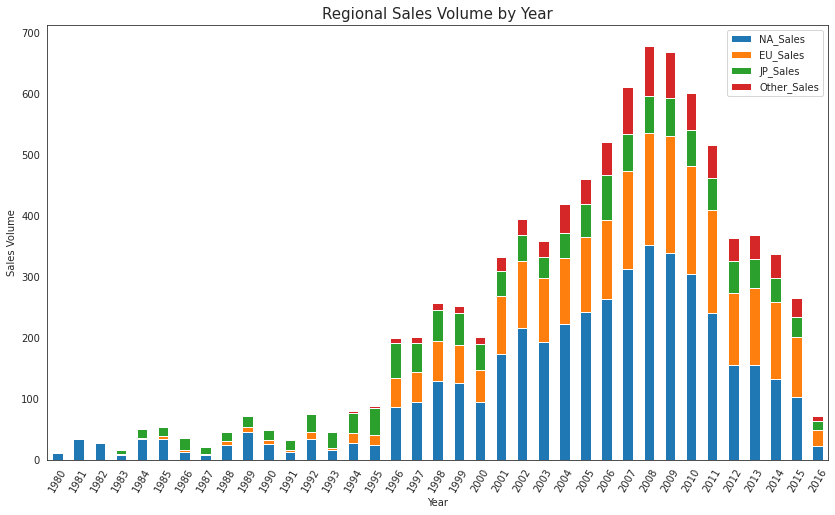

In [ ]:
# 연도별 지역 판매량
df_region= df[df['Year'] != 0].groupby('Year').sum()

plt.rcParams['figure.figsize'] = (14, 8)
sns.set_style('white')
df_region.drop('Total_Sales', axis=1).plot(kind='bar', stacked=True)
plt.title('Regional Sales Volume by Year', size=15)
plt.ylabel('Sales Volume')
plt.xticks(rotation=60)
plt.show()

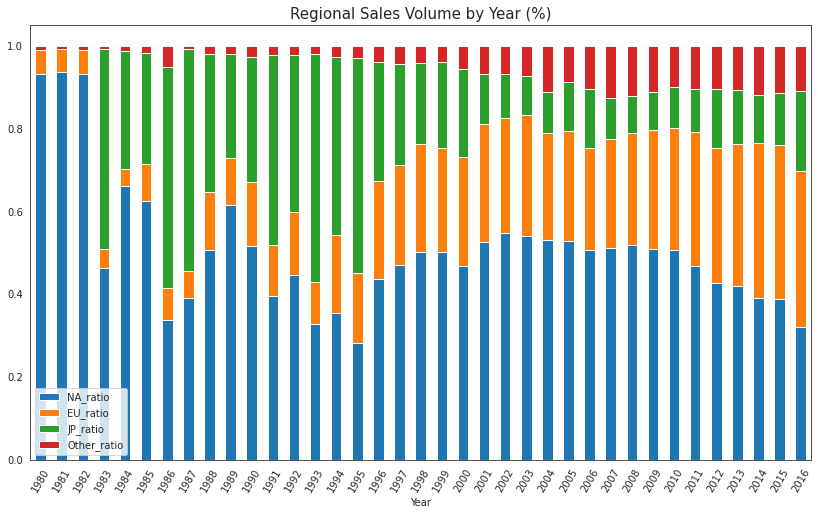

In [ ]:
# 연도별 지역 판매량 백분율
df_region['NA_ratio'] = (df_region['NA_Sales'] / df_region['Total_Sales'])
df_region['EU_ratio'] = (df_region['EU_Sales'] / df_region['Total_Sales'])
df_region['JP_ratio'] = (df_region['JP_Sales'] / df_region['Total_Sales'])
df_region['Other_ratio'] = (df_region['Other_Sales'] / df_region['Total_Sales'])
df_region_r = df_region.iloc[:, -4:]
ax = df_region_r.plot(kind='bar', stacked=True)

plt.title('Regional Sales Volume by Year (%)', size=15)
plt.xticks(rotation=60)
plt.show()

➔  1997년 이후 NA, EU의 판매량이 전체의 70% 이상을 차지하고 있음.
**NA, EU를 타겟 지역**으로 선정

### 2) 장르

In [ ]:
# (필수2)
# 연간 최다 발매 장르
df_yg = df.groupby(['Year', 'Genre']).size().reset_index().rename(columns={0: 'release_cnt'})
df_yg = df_yg[(df_yg['Genre'] != 'Unknown') & (df_yg['Year'] != 0)]
df_yg = df_yg.loc[df_yg.groupby('Year')['release_cnt'].idxmax()].reset_index(drop=True)

# 연간 최다 판매 장르
df_ygs = df[['Year', 'Genre', 'Total_Sales']].groupby(['Year', 'Genre']).sum().reset_index()
df_ygs = df_ygs[(df_ygs['Genre'] != 'Unknown') & (df_ygs['Year'] != 0)]
df_ygs = df_ygs.loc[df_ygs.groupby('Year')['Total_Sales'].idxmax()].reset_index(drop=True)

df_trend = df_yg.merge(df_ygs, on='Year')
df_trend.columns = ['Year', 'release_genre', 'release_cnt', 'sale_genre', 'Total_Sales']
df_trend.tail(10)

,Year,release_genre,release_cnt,sale_genre,Total_Sales
27,2007,Action,210,Action,105.99
28,2008,Action,219,Action,135.46
29,2009,Action,271,Sports,138.59
30,2010,Action,226,Action,117.50
31,2011,Action,239,Action,119.00
32,2012,Action,264,Action,120.81
33,2013,Action,148,Action,125.21
34,2014,Action,186,Action,99.01
35,2015,Action,253,Action,68.25
36,2016,Action,119,Action,19.85


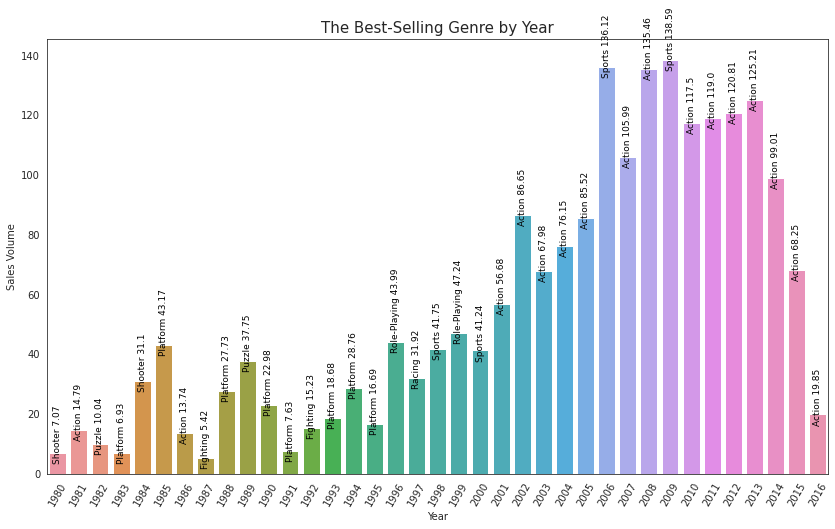

In [ ]:
# 연간 최다 판매 장르 시각화
sns.set_style('white')
g = sns.barplot(data=df_ygs, x='Year', y='Total_Sales', units='Genre')

genre = df_ygs['Genre']

index = 0
for value in df_ygs['Total_Sales']:
    g.text(index, value -3, str(genre[index] + ' ' +str(round(value, 2))), color='#000', size=9, rotation= 90, ha="center")
    index += 1

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 12), 
       textcoords='offset points') 


plt.title('The Best-Selling Genre by Year', size=15)
plt.ylabel('Sales Volume')
plt.xticks(rotation=60)
plt.show()

In [ ]:
# 연간 최다 판매 장르 요약
pd.DataFrame(df_ygs['Genre'].value_counts())

,Genre
Action,16
Platform,8
Sports,4
Shooter,2
Puzzle,2
Role-Playing,2
Fighting,2
Racing,1


➔  연도별 게임의 트렌드가 존재한다.

In [ ]:
# (필수1)
# 지역별 선호 장르 | 사전검정

df_g_pv = df.pivot_table(index='Genre').drop(['Total_Sales', 'Year'], axis=1).T

alpha = 0.05

byregion = df_g_pv.sum(axis=1)
chi1, pvalue1 = chisquare(byregion)

print(chi1)
print(pvalue1)

print(f'p-value가 {pvalue1}으로 alpha(={alpha})보다 높은 수준이므로 귀무가설(지역에 따라 장르별 판매 분포는 비슷하다)을 채택한다.')

2.5159948962859002
0.4724073814430245
p-value가 0.4724073814430245으로 alpha(=0.05)보다 높은 수준이므로 귀무가설(지역에 따라 장르별 판매 분포는 비슷하다)을 채택한다.


In [ ]:
# (필수1)
# 지역별 선호 장르 | 사후검정
df_cg = df.melt(id_vars='Genre', 
                   value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                   var_name='Region', 
                   value_name='Sales'
                   )\
              .groupby(['Region', 'Genre'])\
              .agg(sum)\
              .sort_values('Sales', ascending=False)\
              .reset_index()

df_cg.head()

,Region,Genre,Sales
0,NA_Sales,Action,874.81
1,NA_Sales,Sports,680.52
2,NA_Sales,Shooter,581.92
3,EU_Sales,Action,522.16
4,NA_Sales,Platform,446.44


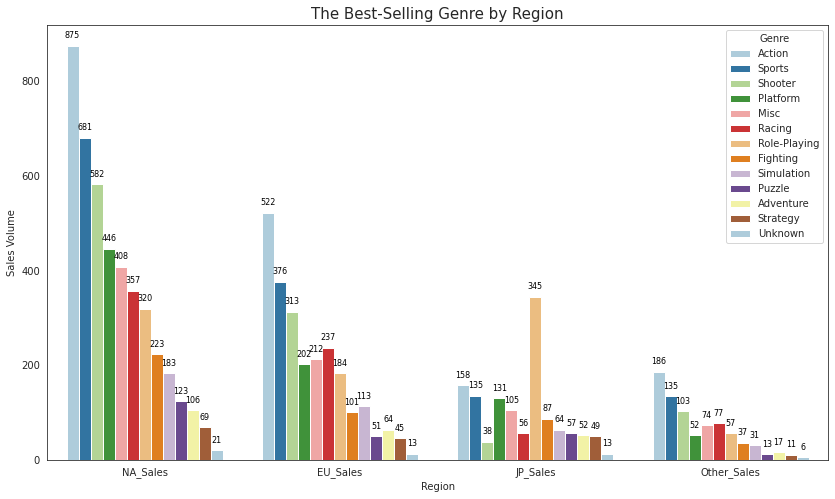

In [ ]:
ax = sns.barplot(data=df_cg, x='Region', y='Sales', hue='Genre', palette='Paired')

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=8, color='black', xytext=(0, 10), 
       textcoords='offset points') 


plt.title('The Best-Selling Genre by Region', size=15)
plt.ylabel('Sales Volume')
plt.show()

### 3) 플랫폼

In [ ]:
df_platform = df[['Platform', 'Total_Sales']]
df_platform['Platform'] = df_platform['Platform'].str.slice(start=0, stop=2)  # 버전 간 합산을 위해 앞 2개의 문자열 slicing
df_ps = df_platform.groupby('Platform').sum().sort_values('Total_Sales', ascending=False).reset_index()
df_ps

,Platform,Total_Sales
0,PS,3580.77
1,Wi,1007.82
2,X3,979.60
3,DS,821.17
4,GB,573.31
5,PC,258.02
6,XB,257.74
7,NE,251.05
8,3D,247.47
9,N6,218.68


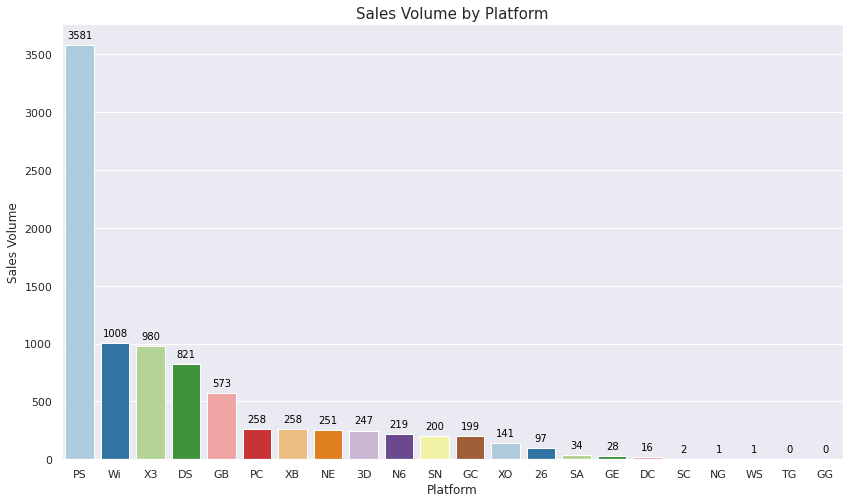

In [ ]:
# 플랫폼별 판매량
sns.set(style='darkgrid')
ax = sns.barplot(data=df_ps, x='Platform', y='Total_Sales', palette='Paired')

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 


plt.title('Sales Volume by Platform', size=15)
plt.ylabel('Sales Volume')
plt.show()

### 4) 게임

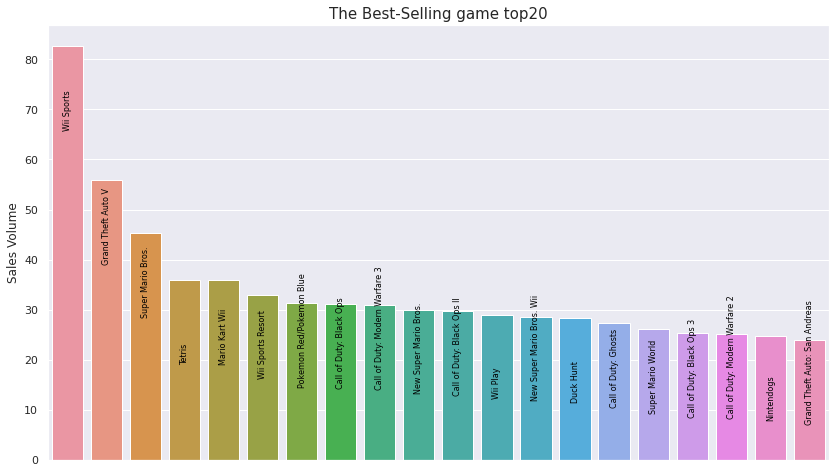

In [ ]:
# (필수3)
# 최다 판매 게임 top20
game_sale = df.groupby(['Name', 'Genre']).sum().sort_values('Total_Sales', ascending=False).drop('Year', axis=1).reset_index()
top_game_sale = game_sale.head(20)
top_game_sale = top_game_sale[['Name', 'Genre', 'Total_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)

name = top_game_sale['Name']

g = sns.barplot(x='Name', y='Total_Sales', data=top_game_sale)

index = 0
for value in top_game_sale['Total_Sales']:
    g.text(index, value - 16.5, name[index], color='#000', size=8, rotation= 90, ha="center")
    index += 1

g.set(xticks=[])
plt.title('The Best-Selling game top20', fontsize=15)
plt.xlabel('')
plt.ylabel('Sales Volume')
plt.show()

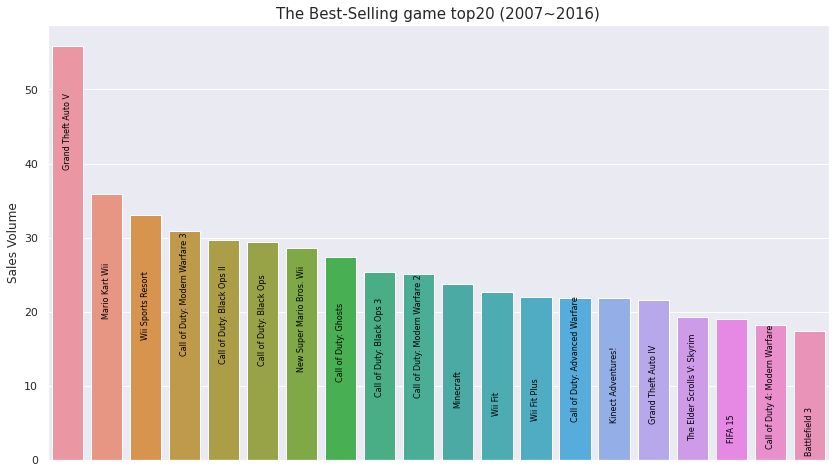

In [ ]:
# 최근 10년 최다 판매 게임 top20
game_sale10 = df_10.groupby(['Name', 'Genre']).sum().sort_values('Total_Sales', ascending=False).drop('Year', axis=1).reset_index()
top_game_sale10 = game_sale10.head(20)
top_game_sale10 = top_game_sale10[['Name', 'Genre', 'Total_Sales']]
top_game_sale10 = top_game_sale10.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale10 = top_game_sale10.reset_index(drop=True)
top_game_sale10

name = top_game_sale10['Name']

g = sns.barplot(x='Name', y='Total_Sales', data=top_game_sale10)
index = 0
for value in top_game_sale10['Total_Sales']:
    g.text(index, value - 16.5, name[index], color='#000', size=8, rotation= 90, ha="center")
    index += 1

g.set(xticks=[])

plt.title('The Best-Selling game top20 (2007~2016)', fontsize=15)
plt.xlabel('')
plt.ylabel('Sales Volume')
plt.show()

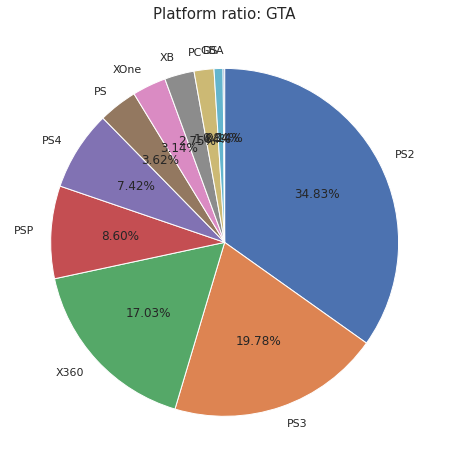

In [ ]:
# gta
df_gta = df[df['Name'].str.contains('Grand Theft Auto')].sort_values('Total_Sales', ascending=False).reset_index(drop=True)
gta_plf = df_gta.groupby('Platform').sum().sort_values('Total_Sales', ascending=False)
plt.pie(gta_plf['Total_Sales'], labels=gta_plf.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.title('Platform ratio: GTA', size=15)
plt.show()

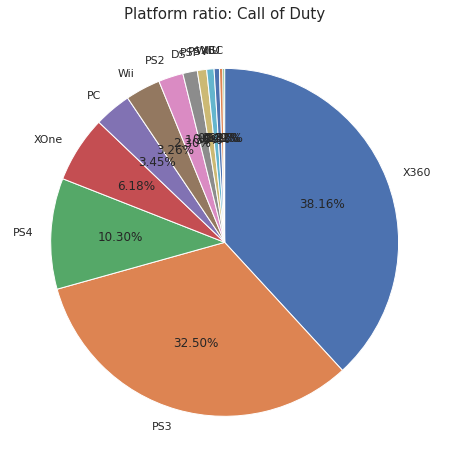

In [ ]:
# call of duty
df_cod = df[df['Name'].str.contains('Call of Duty')].sort_values('Total_Sales', ascending=False).reset_index(drop=True)
df_cod = df_cod.groupby('Platform').sum().sort_values('Total_Sales', ascending=False)

plt.pie(df_cod['Total_Sales'], labels=df_cod.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.title('Platform ratio: Call of Duty', size=15)
plt.show()

#### 분석 결과
- 지역: 북미, 유럽
- 장르: 액션, 슈팅, 스포츠
- 플랫폼: PS, XBOX
- 게임: GTA, Call of Duty 시리즈물